In [1]:
import os
os.environ['Keras Backend'] = 'tensorflow'
import keras
import matplotlib as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

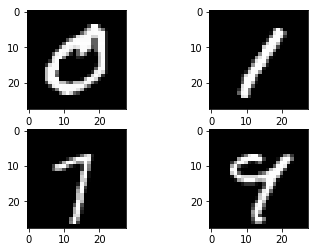

In [3]:
#plotting the images on a gray scale
plt.subplot(221)
plt.imshow(X_train[21], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[54], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
#printing the shape of images
print(X_train.shape)

(60000, 28, 28)


In [5]:
import pandas as pd

In [7]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
seed = 10000
numpy.random.seed(seed)

In [9]:
#Flatten the input matrices so that it can be fed into a feed forward NN
num_pixels = X_train.shape[1] * X_train.shape[2]

In [10]:
#Flattening
X_train_flatten = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
#Normalizing the flattened values helps the optimiser to converge fasters and hence doesn't oscillate too much.
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [13]:
y_train.shape

(60000,)

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
model_1 = Sequential()

In [16]:
model_1.add(Dense(512, input_dim=num_pixels, init='normal', activation='relu', name='main_input'))
model_1.add(Dense(num_classes, init='normal', activation='softmax'))

c:\users\karan\anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, name="main_input", activation="relu", kernel_initializer="normal")`
  """Entry point for launching an IPython kernel.
c:\users\karan\anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="normal", activation="softmax")`
  


In [20]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model_1.fit(X_train_flatten, y_train, validation_data=(X_test_flatten, y_test), nb_epoch=10, batch_size=200, verbose=2)

c:\users\karan\anaconda2\envs\tensorflow\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.3177 - acc: 0.9118 - val_loss: 0.1587 - val_acc: 0.9543
Epoch 2/10
4s - loss: 0.1277 - acc: 0.9634 - val_loss: 0.1064 - val_acc: 0.9680
Epoch 3/10
4s - loss: 0.0860 - acc: 0.9751 - val_loss: 0.0891 - val_acc: 0.9736
Epoch 4/10
4s - loss: 0.0613 - acc: 0.9824 - val_loss: 0.0705 - val_acc: 0.9775
Epoch 5/10
4s - loss: 0.0454 - acc: 0.9874 - val_loss: 0.0698 - val_acc: 0.9782
Epoch 6/10
4s - loss: 0.0349 - acc: 0.9902 - val_loss: 0.0702 - val_acc: 0.9768
Epoch 7/10
4s - loss: 0.0276 - acc: 0.9928 - val_loss: 0.0638 - val_acc: 0.9795
Epoch 8/10
4s - loss: 0.0209 - acc: 0.9949 - val_loss: 0.0649 - val_acc: 0.9786
Epoch 9/10
4s - loss: 0.0155 - acc: 0.9968 - val_loss: 0.0576 - val_acc: 0.9817
Epoch 10/10
4s - loss: 0.0123 - acc: 0.9974 - val_loss: 0.0604 - val_acc: 0.9814
